In [10]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 11,7

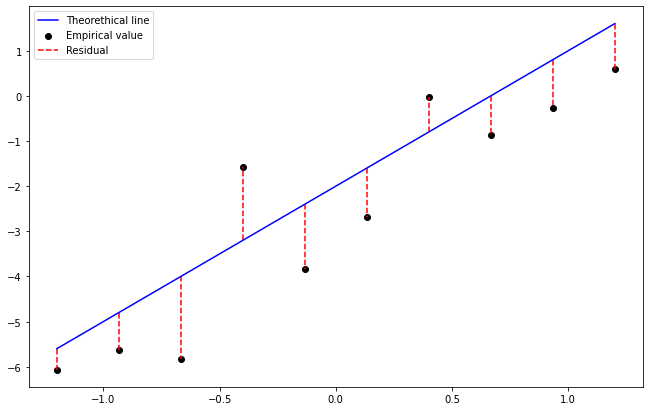

In [11]:
x = np.linspace(-1.2,1.2,10)
y = 3*x - 2
dy = 4*np.random.rand(10)-2
fig, ax = plt.subplots()
ax.plot(x,y, color = 'blue')
ax.scatter(x,y+dy,color='black')
ax.vlines(x,y,y+dy, colors='r', linestyles='--')
ax.legend( ['Theorethical line', 'Empirical value', 'Residual'])
# Комментарии к объектам на ваше усмотрение, Никита Вячеславович.
plt.show()

# Построим прямую, пользуясь методом наименьших квадратов

In [12]:
n = 20 # Определяем количестов точек, в которых производим измерения
a = -5 # Левая граница отрезка
b = 5 # Правая граница отрезка
x = np.linspace(a,b,n) # Разбиваем отрезок измерения на N 
y = np.random.randint(-10, 10, n) # Значения для игра выбереме случайным образом.
# В теории это зависимая величина, которая получается эмпирически

# Вычислим коэффициенты для подгоночной прямой

## $$\hat{\beta_1} = \frac{cov(x,y)}{Var(x)}$$
## $$\hat{\beta_0} = \bar{y} - \bar{x}\cdot{\hat{\beta_1}}$$

### np.sum(x*y) --- сумма произведений элементов массива.
### np.sum(x**2) --- сумма квадратов элементов массива
### np.sum(x)**2--- квадрат суммы элементов массива
### np.mean(x) --- среднее значение массива 

In [67]:
beta1 = (np.sum(x*y)/n - (np.sum(x)/n)*np.sum(y)/n)/(np.sum(x**2)/n - np.sum(x)**2/n)
beta1

-0.6014285714285713

In [68]:
beta0 = np.mean(y) - np.mean(x)*beta1
beta0

-0.5500000000000002

# Вычислим массив предсказанных значений <span style="color:red"> y_pred </span>
# $$ \hat{y_i} = \hat{\beta_0} + \hat{\beta_1} x_i $$

In [35]:
pred_y = beta0 + beta1*x

# Строим график 

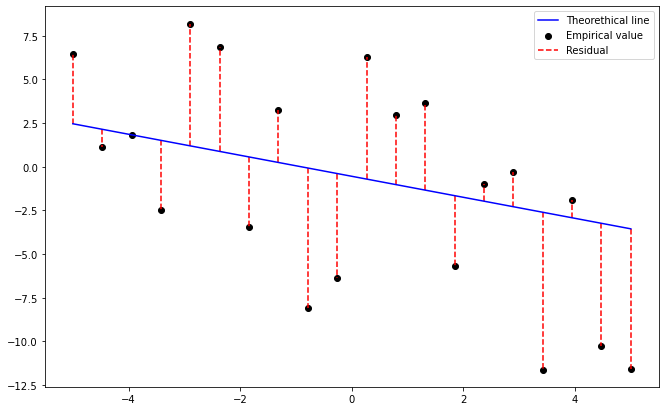

In [37]:
dy = y
fig, ax = plt.subplots()
ax.plot(x,lid_y, color = 'blue')
ax.scatter(x,pred_y+dy,color='black')
ax.vlines(x,lid_y,lid_y+dy, colors='r', linestyles='--')
ax.legend( ['Theorethical line', 'Empirical value', 'Residual'])
plt.show()

# Рассчитаем коэффициент детерминации регресии


## $$ R^2 = \frac{ESS}{TSS} = 1 - \frac{RSS}{TSS} $$
### $$ TSS = \sum\limits_{i=1}^{i=n}{(y_i - \bar{y})^2} $$
### $$ ESS = \sum\limits_{i=1}^{i=n}{(\hat{y_i} - \bar{y_i})^2} $$
### $$ RSS = \sum\limits_{i=1}^{i=n}{(y_i - \hat{y})^2} $$

In [59]:
# полная сумма квадратов
TSS = np.sum(((y-np.mean(y))**2)) 
TSS

542.9499999999999

In [61]:
# объяснённая сумма квадратов
ESS = np.sum(((pred_y - np.mean(y))**2)) 
ESS

66.63195488721803

In [62]:
#остаточная сумма квадратов
RSS = np.sum((y-pred_y)**2)
RSS

476.31804511278193

In [63]:
# коэффициент детерминации
R2det = ESS/TSS 
R2det

0.12272208285701822